In [3]:
#Import Required Pacakges
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math
import pickle

import matplotlib
import matplotlib.pyplot as plt

In [4]:
# load Corpus Dataframe
#Open Corpus of News Article Text
with open('../news_articles_processing/data_frames/bitcoin_news_df_processed_for_modeling.pickle', 'rb') as file:
     bitcoin_news_df = pickle.load(file)

In [5]:
bitcoin_news_df

,text,date,sent_with_num,tokenized_text,tfid_vec_text,stemmed_text,lemmatized_text,pos_text,tokenized_sent_with_num,pos_sent_with_num
0,the social liberal party yabloko in a new proj...,1970-01-01 06:00:00,[for the first time the issue is brought to th...,"[social, liberal, party, yabloko, new, project...","(0, 128167)\t0.02305248704984943\n (0, 1278...","[social, liber, parti, yabloko, new, project, ...","[social, liberal, party, yabloko, new, project...","[[(social, JJ)], [(liberal, JJ)], [(party, NN)...","[[for, the, first, time, the, issue, is, broug...","[[(for, IN), (the, DT), (first, JJ), (time, NN..."
1,social blogging platform akasha nears public a...,2012-05-18 00:00:00,[and what better day to unveil this project th...,"[social, blogging, platform, akasha, nears, pu...","(0, 128438)\t0.01344544437400322\n (0, 1279...","[social, blog, platform, akasha, near, public,...","[social, blogging, platform, akasha, nears, pu...","[[(social, JJ)], [(blogging, NN)], [(platform,...","[[and, what, better, day, to, unveil, this, pr...","[[(and, CC), (what, WP), (better, JJR), (day, ..."
2,the blue house the executive office and offici...,2013-01-31 07:00:00,[pic.twitter.comtb5tdviv2k — joseph young iamj...,"[blue, house, executive, office, official, res...","(0, 128416)\t0.035496987201673366\n (0, 126...","[blue, hous, execut, offic, offici, resid, sou...","[blue, house, executive, office, official, res...","[[(blue, NN)], [(house, NN)], [(executive, NN)...","[[pic.twitter.comtb5tdviv2k, —, joseph, young,...","[[(pic.twitter.comtb5tdviv2k, NN), (—, NNP), (..."
3,mayfujianaccording to the official release of ...,2013-04-11 00:00:00,[5th mayfujianaccording to the official releas...,"[mayfujianaccording, official, release, china,...","(0, 126977)\t0.018151078387068406\n (0, 126...","[mayfujianaccord, offici, releas, china, secur...","[mayfujianaccording, official, release, china,...","[[(mayfujianaccording, VBG)], [(official, NN)]...","[[5th, mayfujianaccording, to, the, official, ...","[[(5th, CD), (mayfujianaccording, NN), (to, TO..."
4,large us financial exchange forgoes bitcoin fu...,2013-07-17 00:00:00,[instead they prefer hedging against any perce...,"[large, us, financial, exchange, forgoes, bitc...","(0, 128376)\t0.061126621514528065\n (0, 127...","[larg, us, financi, exchang, forgo, bitcoin, f...","[large, u, financial, exchange, forgoes, bitco...","[[(large, JJ)], [(us, PRP)], [(financial, JJ)]...","[[instead, they, prefer, hedging, against, any...","[[(instead, RB), (they, PRP), (prefer, VBP), (..."
5,about the authorjimmy has been following the d...,2013-07-22 11:00:00,[],"[authorjimmy, following, development, blockcha...","(0, 127992)\t0.15587442224013837\n (0, 1157...","[authorjimmi, follow, develop, blockchain, sev...","[authorjimmy, following, development, blockcha...","[[(authorjimmy, NN)], [(following, VBG)], [(de...",[],[]
6,it has been almost years since bitcoin was int...,2013-07-29 21:00:00,[it has been almost 8 years since bitcoin was ...,"[almost, years, since, bitcoin, introduced, wo...","(0, 128438)\t0.04526756792098975\n (0, 1283...","[almost, year, sinc, bitcoin, introduc, world,...","[almost, year, since, bitcoin, introduced, wor...","[[(almost, RB)], [(years, NNS)], [(since, IN)]...","[[it, has, been, almost, 8, years, since, bitc...","[[(it, PRP), (has, VBZ), (been, VBN), (almost,..."
7,oecd warns crypto and blockchain are challengi...,2013-10-23 00:00:00,[oecd warns crypto and blockchain are challeng...,"[oecd, warns, crypto, blockchain, challenging,...","(0, 128438)\t0.05619926662048542\n (0, 1266...","[oecd, warn, crypto, blockchain, challeng, tax...","[oecd, warns, crypto, blockchain, challenging,...","[[(oecd, NN)], [(warns, NNS)], [(crypto, NN)],...","[[oecd, warns, crypto, and, blockchain, are, c...","[[(oecd, NN), (warns, VBZ), (crypto, NN), (and..."
8,the indian central banks crackdown on virtual ...,2013-10-25 00:00:00,[the indian central bank’s crackdown on virtua...,"[indian, central, banks,

In [3]:
#Create Sentiment Dataframe and Add Dates and Sentences with Numbers Column from bitcoin dataframe
sentiment_df_with_num = pd.DataFrame(columns=['date','article','article_polarity_neg_pos','article_subjectivity'])

sentiment_df_without_num = pd.DataFrame(columns=['date','article','article_polarity_neg_pos','article_subjectivity'])

#Assign Date and Sent With Number Values
sentiment_df_with_num.date = bitcoin_news_df['date']
sentiment_df_without_num .date = bitcoin_news_df['date']

sentiment_df_with_num.article = bitcoin_news_df['sent_with_num']
sentiment_df_without_num.article = bitcoin_news_df['text']

#Join sentences with number into single paragraph
sentiment_df_with_num.article = sentiment_df_with_num.article.apply(lambda x: ' '.join(x))

In [4]:
#Remove All Rows That Don't Have Date and Text and Reset Index
sentiment_df_with_num = sentiment_df_with_num[sentiment_df_with_num['article'] != '']
sentiment_df_with_num = sentiment_df_with_num.reset_index(drop=True)


sentiment_df_without_num = sentiment_df_without_num[sentiment_df_without_num['article'] != '']
sentiment_df_without_num = sentiment_df_without_num.reset_index(drop=True)

In [5]:
#Split data frame to previous 2.5 years only January 2017 - June 2019
sentiment_df_with_num_2_5_years = sentiment_df_with_num[sentiment_df_with_num.date >= '2017-02-08 00:00:00']
sentiment_df_without_num_2_5_years = sentiment_df_without_num[sentiment_df_without_num.date >= '2017-02-08 00:00:00']

In [6]:
#Define Sentiment Function
def sentiment_parser(corpus):
    total_sentiment = []
    for line in corpus:
        line_sent=TextBlob(line).sentiment.polarity
        total_sentiment.append(line_sent)
    return total_sentiment

In [7]:
#Define Subjectivity Function
def subjectivity_parser(corpus):
    total_sentiment = []
    for line in corpus:
        line_sent=TextBlob(line).sentiment.subjectivity
        total_sentiment.append(line_sent)
    return total_sentiment

In [8]:
#Calculate Sentiment of Articles with Numbers
sentiment_articles_with_num = sentiment_parser(sentiment_df_with_num_2_5_years.article)

#Calculate Polarity of Articles with Numbers
subjectivity_articles_with_num = subjectivity_parser(sentiment_df_with_num_2_5_years.article)

In [9]:
#Calculate Sentiment of Articles with Numbers
sentiment_articles_without_num = sentiment_parser(sentiment_df_without_num_2_5_years.article)

#Calculate Polarity of Articles with Numbers
subjectivity_articles_without_num = subjectivity_parser(sentiment_df_without_num_2_5_years.article)

In [10]:
#Fill 2.5 Year Dataframe Sentiment and Subjectivity Columns with values calculated above
sentiment_df_with_num_2_5_years.article_polarity_neg_pos = sentiment_articles_with_num
sentiment_df_with_num_2_5_years.article_subjectivity = subjectivity_articles_with_num

sentiment_df_without_num_2_5_years.article_polarity_neg_pos = sentiment_articles_without_num
sentiment_df_without_num_2_5_years.article_subjectivity = subjectivity_articles_without_num

C:\Users\moham\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [11]:
#In order to calculate the average sentiment and subjectivity across a day, will remove timestamps and keep date columns in 
#date only form 
sentiment_df_with_num_2_5_years.date = pd.to_datetime(sentiment_df_with_num_2_5_years['date']).dt.date
sentiment_df_without_num_2_5_years.date = pd.to_datetime(sentiment_df_without_num_2_5_years['date']).dt.date

In [12]:
#Check Work
sentiment_df_with_num_2_5_years.head(3)

,date,article,article_polarity_neg_pos,article_subjectivity
8536,2017-02-08,the cryptocurrency whose price fell below the ...,-0.071429,0.178571
8537,2017-02-08,bitcoin community members hope litecoin’s segw...,0.145833,0.487500
8538,2017-02-08,it manages an investment pool where it specula...,0.190201,0.479579


In [13]:
#Calculate Mean Sentiment and Subjectivty Across Days
mean_sentiment_subjectivity_across_days_with_num = sentiment_df_with_num_2_5_years.groupby(['date']).mean()
mean_sentiment_subjectivity_across_days_without_num = sentiment_df_without_num_2_5_years.groupby(['date']).mean()

In [14]:
#Save Dataframes
with open('./data_frames/mean_sent_subj_across_days_2_5_years_with_num.pickle', 'wb') as file:
     pickle.dump(mean_sentiment_subjectivity_across_days_with_num, file)
        
with open('./data_frames/mean_sent_subj_across_days_2_5_years_without_num.pickle', 'wb') as file:
     pickle.dump(mean_sentiment_subjectivity_across_days_without_num, file)

In [15]:
#load Dataframes
with open('./data_frames/mean_sent_subj_across_days_2_5_years_with_num.pickle', 'rb') as file:
     mean_sentiment_subjectivity_across_days_with_num= pickle.load(file)
        
with open('./data_frames/mean_sent_subj_across_days_2_5_years_without_num.pickle', 'rb') as file:
     mean_sentiment_subjectivity_across_days_without_num = pickle.load(file)

In [16]:
mean_sentiment_subjectivity_across_days_without_num.head(5)

,article_polarity_neg_pos,article_subjectivity
date,,
2017-02-08,0.041166,0.273986
2017-02-09,0.046156,0.316589
2017-02-10,0.056675,0.297010
2017-02-11,0.017635,0.175208
2017-02-12,0.170225,0.495425


In [17]:
indexed_df = mean_sentiment_subjectivity_across_days_without_num.copy(deep=True)

In [18]:
time_series_sentiment = indexed_df['article_polarity_neg_pos']
time_series_sentiment.head(2)

date
2017-02-08    0.041166
2017-02-09    0.046156
Name: article_polarity_neg_pos, dtype: float64

In [19]:
i = 0
average_sentiment = []
while i <= len(time_series_sentiment):
    average_sentiment.append(np.mean(time_series_sentiment[i:i+7]))
    i+=7

In [20]:
#reset index of dataframe
mean_sentiment_subjectivity_across_days_without_num.reset_index(inplace=True)

In [21]:
#grab list of dates by week
i = 0
date_stamps =[]
while i <= len(mean_sentiment_subjectivity_across_days_without_num.date):
    date_stamps.append(mean_sentiment_subjectivity_across_days_without_num.date[i])
    i+=7

In [22]:
def graph_sentiment(sentiment_data, article_date_stamps, file_name, type_of_analysis=None):
    """
    This function plots a graph of bitcoin news article sentiment or subjectivity averages across days of week for last 2.5 years
    sentiment_data : Sentiment Data Average Across Last 2.5 Years
    file_name: Name of file that image of graph will be saved as
    type_of_analysis: sentiment or subjectivity
    """
    fig, ax = plt.subplots(figsize=(20, 15));
    plt.figure(dpi=600);

    if type_of_analysis=="Sentiment":
        ax.set_ylabel('Sentiment Rating -1.0-1.0', fontsize=20)
    else:
        ax.set_ylabel('Subjectivity Rating 0.0-1.0', fontsize=20)
        
    ax.set_xlabel('Day', fontsize=20)
    ax.set_title ('Average '+ type_of_analysis +' Across Day of Week of Bitcoin News Articles From 02-01-2017 to 06-01-2019', fontsize=20)
    for tick in ax.xaxis.get_major_ticks():
            tick.label.set_fontsize(20) 
    for tick in ax.yaxis.get_major_ticks():
            tick.label.set_fontsize(20) 
    ax.plot(article_date_stamps,sentiment_data);
    
    fig.tight_layout()
    
    fig.savefig('./graphs/'+file_name+'.png', dpi=600)
    return ax

C:\Users\moham\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


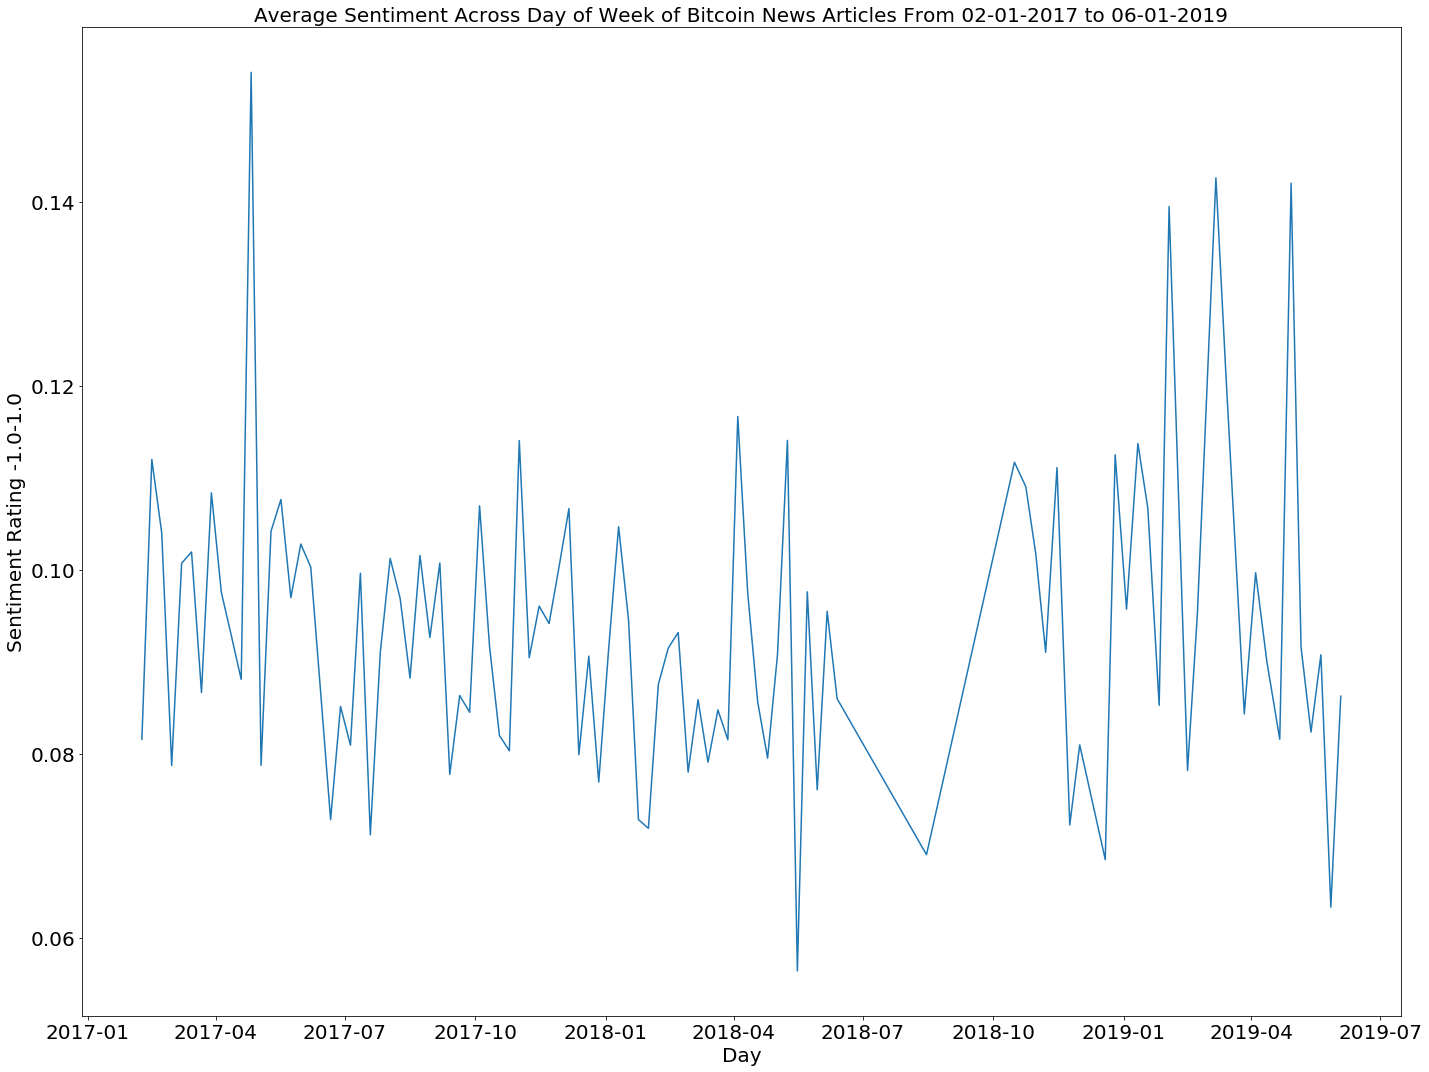

<Figure size 3600x2400 with 0 Axes>

In [23]:
graph_sentiment(average_sentiment, date_stamps, 'average_weekly_sentiment', 'Sentiment')

In [24]:
#Open average daily bitcoin price dataframe
with open('../crypto_currency_and_market_value_history/data/average_daily_bitcoin_price_2_5_years.pickle', 'rb') as file:
     average_daily_bitcoin_price_2_5_years = pickle.load(file)

In [25]:
average_daily_bitcoin_price_2_5_years = average_daily_bitcoin_price_2_5_years[average_daily_bitcoin_price_2_5_years.timestamp >= datetime.date(datetime(2017, 2, 8))]

In [35]:
merged_date_frames = pd.merge(mean_sentiment_subjectivity_across_days_without_num,average_daily_bitcoin_price_2_5_years, left_on='date', right_on='timestamp')
merged_date_frames.drop(['timestamp'],axis=1, inplace=True)
merged_date_frames.head(3)

,date,article_polarity_neg_pos,article_subjectivity,weighted price,price_percent_change
0,2017-02-08,0.041166,0.273986,1053.338333,1.031734
1,2017-02-09,0.046156,0.316589,1022.830833,-2.896268
2,2017-02-10,0.056675,0.297010,977.750833,-4.407376


In [37]:
#Average bitcoin weekly price
i = 0
average_price = []
while i <= len(merged_date_frames['weighted price']):
    average_price.append(np.mean(merged_date_frames['weighted price'][i:i+7]))
    i+=7

In [94]:
def graph_weekly_price_against_sentiment(article_date_stamps, article_sentiment_df, bitcoin_price_df, title_description, file_name=None):
    
    fig, ax1 = plt.subplots(figsize=(20, 15))
    plt.figure(dpi=600);
    
    x_axis = article_date_stamps
    
    color = 'black'
    ax1.set_title ('Bitcoin Prices vs Sentiment ' +title_description+' Analysis ', fontsize=25)
    ax1.set_xlabel('Week',fontsize=25)
    ax1.set_ylabel('Sentiment -1.0-1.0', color=color,fontsize=25)
    ax1.plot(x_axis, article_sentiment_df, color=color, label='Article Sentiment', linewidth=3.0)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.legend(['Sentiment'], fontsize = 20, loc ='upper right')

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'red'
    ax2.set_ylabel('Bitcoin Prices', color=color,fontsize=25)  # we already handled the x-label with ax1
    ax2.plot(x_axis, bitcoin_price_df, color=color, label='Average Bitcoin Price', linewidth=3.0)
    ax2.tick_params(axis='y', labelcolor=color)
    ax1.tick_params(axis="x", labelsize=22)
    ax1.tick_params(axis="y", labelsize=22)
    ax2.tick_params(axis="y", labelsize=22)
    ax2.legend(['Bitcoin Price USD'], fontsize=20, loc ='upper center')
    
    fig.tight_layout()
                                  
    fig.savefig('./graphs/'+file_name+'.png', dpi=600)
    #plt.show()
    
    return None

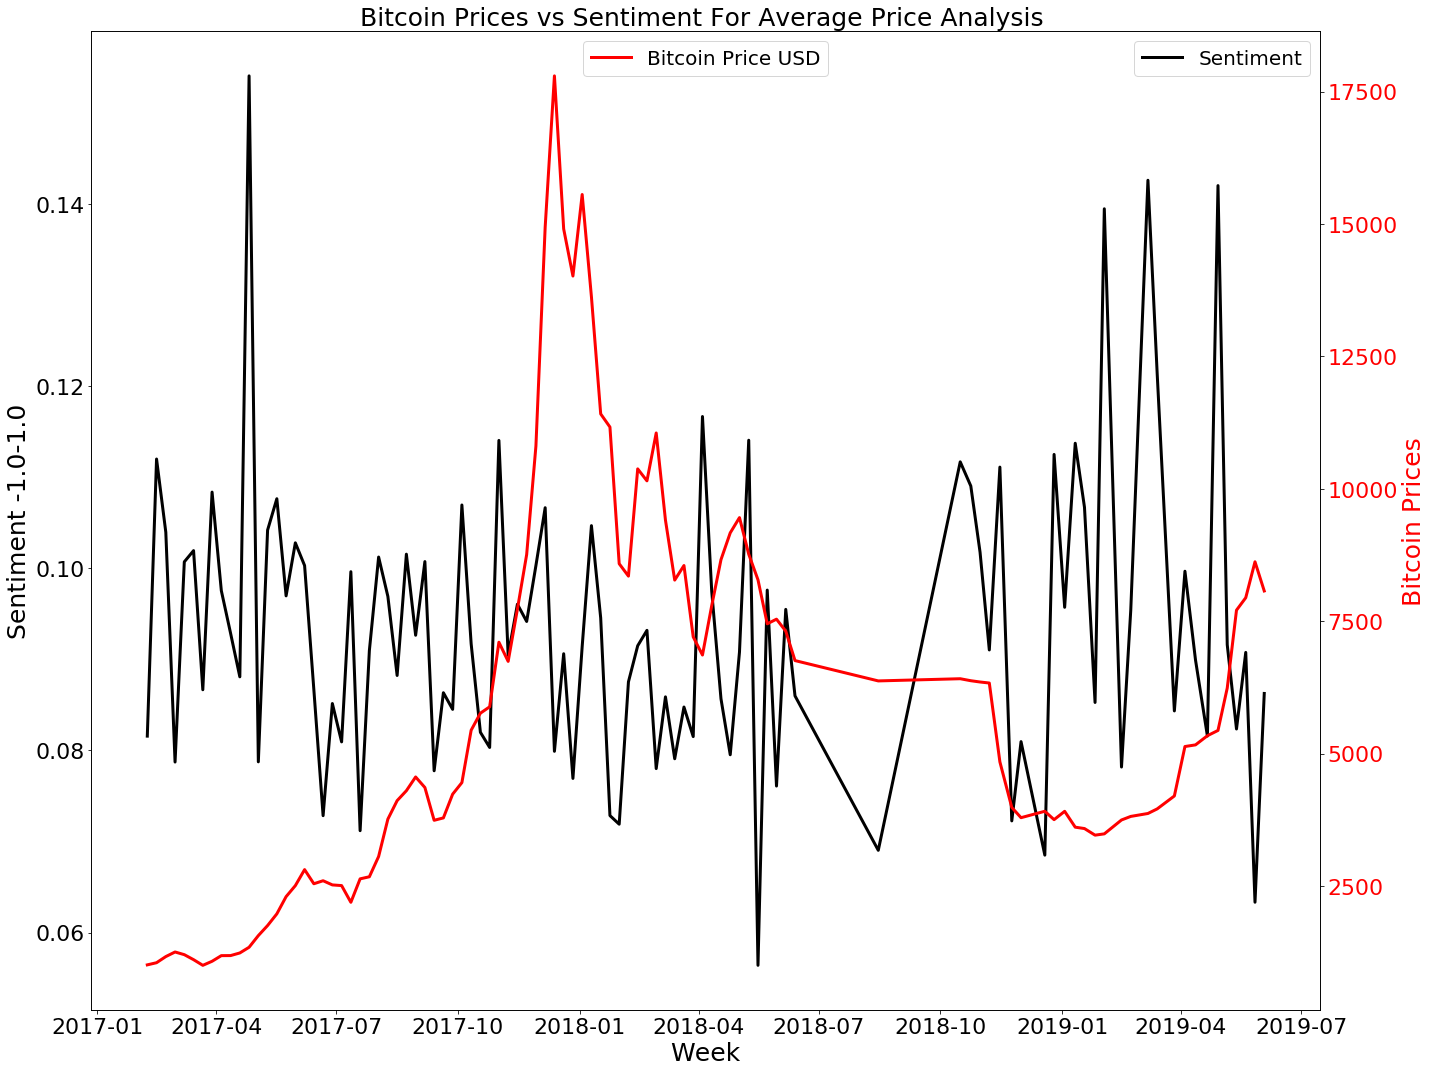

<Figure size 3600x2400 with 0 Axes>

In [95]:
#Graph Bitcoin Price Vs Sentiment Analysis For Greatest Price Change
graph_weekly_price_against_sentiment(date_stamps,average_sentiment,average_price,'For Average Price', 'bitcoin_weekly_average_price_v_sentiment')

In [ ]:
# mean_sentiment_subjectivity_across_days_with_num;
average_daily_bitcoin_price_2_5_years.head(5)

In [ ]:
#Merge Dataframes Bitcoin Weighted Price and Sentiment Analysis Article Dataframe
bitcoin_price_and_sentiment_df_with_num = pd.DataFrame.merge(average_daily_bitcoin_price_2_5_years,mean_sentiment_subjectivity_across_days_with_num,\
                   left_on=['timestamp'],right_on=['date'])     

#Drop date column 
# bitcoin_price_and_sentiment_df_with_num.drop('date', axis=1,inplace=True)

bitcoin_price_and_sentiment_df_with_num.head(5)

In [ ]:
#Merge Dataframes Bitcoin Weighted Price and Sentiment Analysis Article Dataframe
bitcoin_price_and_sentiment_df_without_num = pd.DataFrame.merge(average_daily_bitcoin_price_2_5_years,mean_sentiment_subjectivity_across_days_without_num,\
                   left_on=['timestamp'],right_on=['date'])     

#Drop date column 
# bitcoin_price_and_sentiment_df_without_num.drop('date', axis=1,inplace=True)

bitcoin_price_and_sentiment_df_without_num.head(5)

In [ ]:
#Graph Bitcoin Price Vs Sentiment Analysis For Greatest Price Change
window_size = [0,100,200,300,400,500,600,700]

graph_window = []
for count, elem in enumerate(window_size):
    graph_window.append([count,count+1])

In [ ]:
for i in graph_window[:-1]:
    window_size[i[0]]
    graph_price_against_sentiment(bitcoin_price_and_sentiment_df_without_num['article_polarity_neg_pos'][window_size[i[0]]:window_size[i[1]]],
                                  bitcoin_price_and_sentiment_df_without_num['weighted price'][window_size[i[0]]:window_size[i[1]]],
                                  'Days '+str(window_size[i[0]])+' to '+str(window_size[i[1]]), 
                                  'bitcoin_price_v_sentiment_with_num_'+str(window_size[i[0]])+'_'+str(window_size[i[1]]))